# Overcoming Uncertainty with Bayesian Probability

# Task 1: Import Libraries

In [1]:
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

## Task 2: Understand Bayes' Rule
Steps:
1. Generate 1000 random coin flips using a biased coin. (Set the probability of getting heads equal to 0.4)
2. Use Bayes' Rule to compute the probability that the coin is fair. Do this by incrementally increasing the samples from 1 to 1000
3. Create a graph using Matplotlib that shows how the probability that the coin is fair changes as we increase the sample size. Set the $x$-axis equal to the number of samples and the $y$-axis equal to the probability the coin is fair.

Text(0, 0.5, 'Posterior')

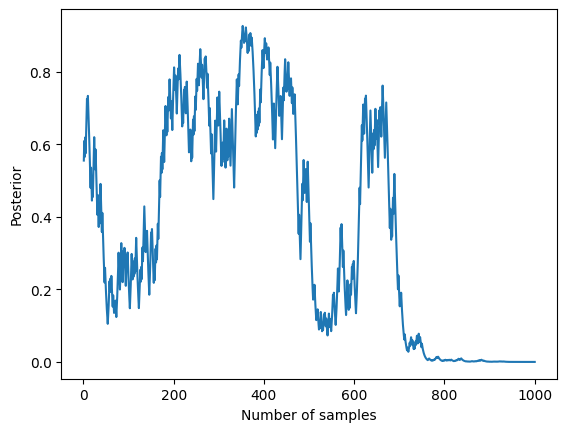

In [2]:
k = 1000
p_fair = 0.5
fair = np.array([0.5, 0.5])
biased = np.array([0.4, 0.6])

# Simulate some coin flips
samples = np.random.binomial(1, biased[1], k)

posteriors = []
for n_samples in range(1, k+1):
    subset = samples[0:n_samples]
    p_obs_fair = np.prod(fair[subset]) # P(B|A)
    p_obs_biased = np.prod(biased[subset])  # P(B|A')
    p_obs = (p_fair * p_obs_fair) + ((1 - p_fair) * p_obs_biased) # P(B)
    posterior = (p_obs_fair * p_fair)/p_obs # Bayes' Rule
    posteriors.append(posterior)
    
# Create graph
plt.plot(range(1, k+1), posteriors)
plt.xlabel("Number of samples")
plt.ylabel("Posterior")


## Task 3:
Suppose you’re flipping a fair coin between 5 and 20 times. Plot how the probability of getting exactly 5 heads changes as the total number of flips increases. To complete this task, do the following:
1. For each number of flips from 5 to 20, compute the probability of getting exactly 5 heads.
2. Plot a graph with the number of trials on the $x$-axis and the probabilities on the $y$-axis.

Text(0.5, 1.0, 'Binomial Distribution: 5 heads out of 5-20 samples')

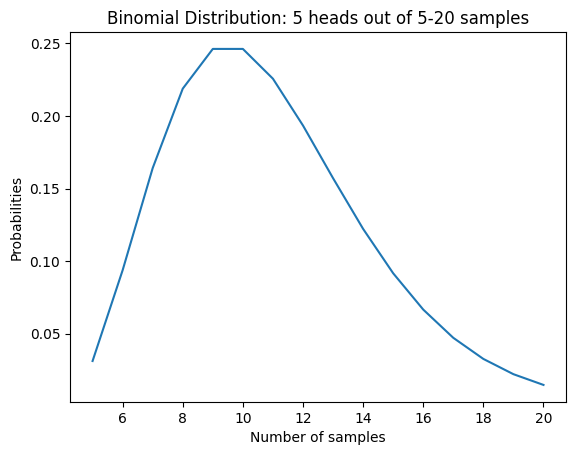

In [4]:
n_trials = np.arange(5, 21)
probs = s.binom.pmf(5, n_trials, 0.5)
plt.plot(n_trials, probs)
plt.xlabel("Number of samples")
plt.ylabel("Probabilities")
plt.title('Binomial Distribution: 5 heads out of 5-20 samples')

## Task 4: Create the Conversion Rates Dataset
Start by constructing a synthetic dataset, which you will use in the upcoming tasks. To complete this task, do the following 200 times, once for each product you will be simulating:
1. Generate a random number of views between 1 and 30.
2. Pick a random probability for the true conversion rate. This will be the target variable to be estimated from the view and order data.
3. Using the number of views and the conversion rate, simulate how many of those views become actual orders.

In [6]:
# 200 products with 0 to 30 views
views = np.random.randint(0, 30, 200)

# Conversion rates
# p for the binomial distribution, randomized for each of the 200 products
p = np.random.rand(1, 200)

total_orders = np.random.binomial(views, p).flatten()

## Task 5: Compute Maximum Liklihood Estimates